# MINI PROJECT 

In [23]:
import pandas as pd

# I have downloded the given data set and have provided the csv file path here 
file_path = 'C:/Users/LENOVO/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/mini_project.csv'

df = pd.read_csv(file_path)
# lets display first 10 rows of the data to check wether the path is working or not
df.head(10)


,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
5,6,online,2014,246,50.1,76.0,Beginner,Math
6,7,online,2021,241,87.83,84.0,Beginner,Science
7,8,online,2018,261,76.48,88.0,NaN,Technology
8,9,online,2019,261,83.97,87.0,NaN,Technology
9,10,classroom,2016,180,83.53,79.0,Beginner,Engineering


## Missing Values

In [8]:
# is null will check if any entry is zero and sum will calculate their total numbers
print(df.isnull().sum())

# dtypes is used to check the data types of columns
print(df.dtypes)


course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64
course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object


## Filling missing values

In [15]:
# Replace non-numeric values with NaN in pre_score and post_score
df['pre_score'] = pd.to_numeric(df['pre_score'], errors='coerce')
df['post_score'] = pd.to_numeric(df['post_score'], errors='coerce')

# Fill missing values in pre_score and post_score with the mean of the respective columns
df['pre_score'].fillna(df['pre_score'].mean(), inplace=True)
df['post_score'].fillna(df['post_score'].mean(), inplace=True)

# Fill missing values in pre_requirement with the mode (most frequent value)
df['pre_requirement'].fillna(df['pre_requirement'].mode()[0], inplace=True)

# Verify 
print(df.isnull().sum())


course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64


In [14]:
# describe call is used to summarize all stats
df.describe()


,course_id,year,enrollment_count,pre_score,post_score
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,925.500000,2016.423784,231.565405,49.527320,75.204805
std,534.193317,3.448278,36.987029,27.808131,8.074932
min,1.000000,2011.000000,154.000000,1.020000,51.000000
25%,463.250000,2013.000000,185.000000,26.317500,70.000000
50%,925.500000,2016.000000,251.000000,49.527320,75.204805
75%,1387.750000,2019.000000,261.000000,72.525000,80.000000
max,1850.000000,2022.000000,267.000000,100.000000,105.000000


## Visualization

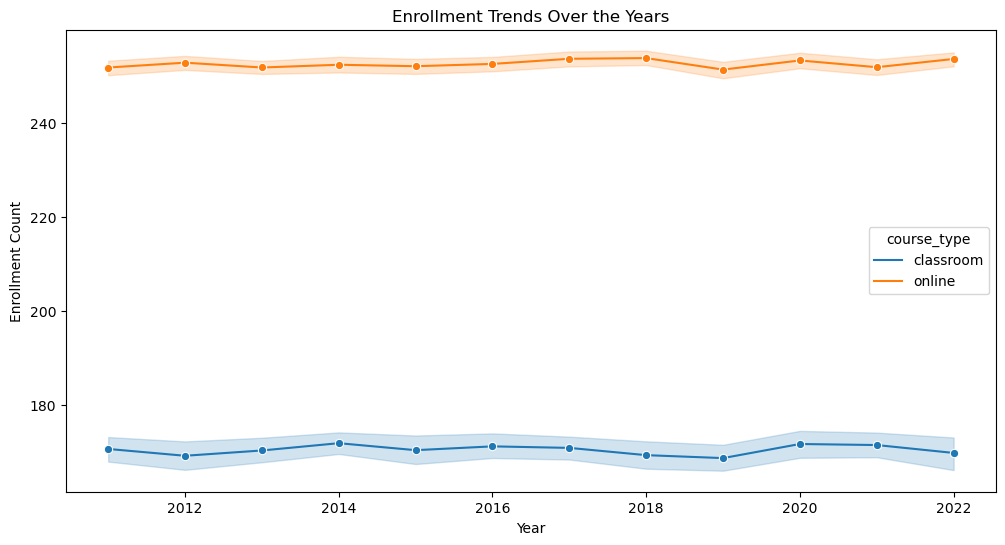

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress the specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Enrollment trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='enrollment_count', hue='course_type', marker='o')
plt.title('Enrollment Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.show()


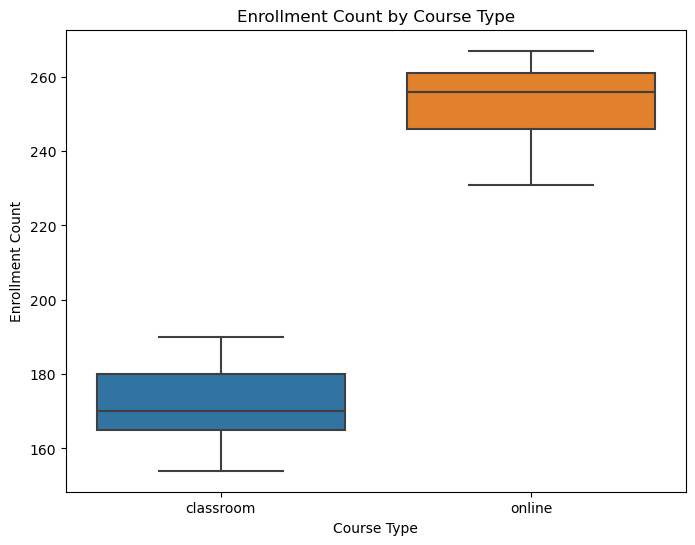

In [17]:
# Compare enrollment counts between online and classroom courses
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='course_type', y='enrollment_count')
plt.title('Enrollment Count by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Enrollment Count')
plt.show()


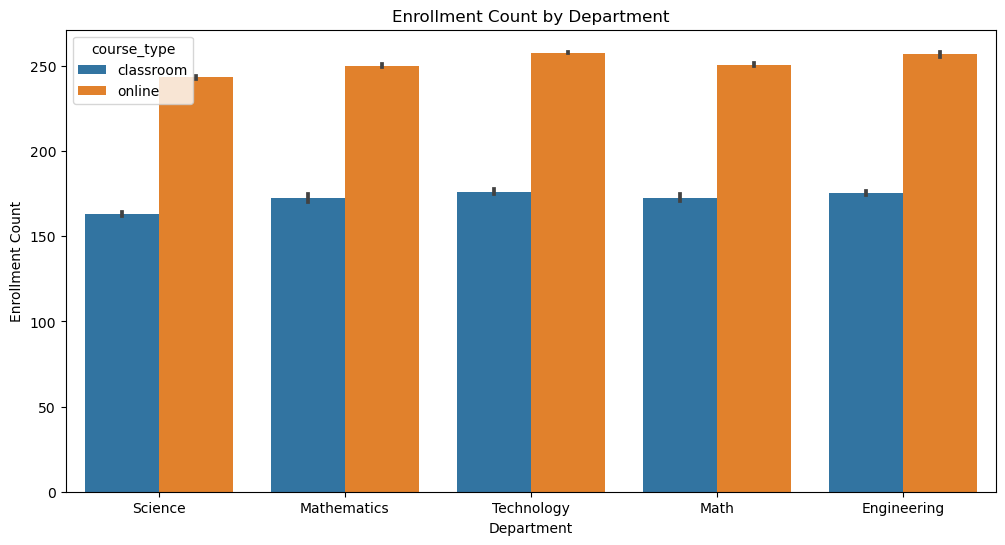

In [18]:
# Enrollment count by department
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='department', y='enrollment_count', hue='course_type')
plt.title('Enrollment Count by Department')
plt.xlabel('Department')
plt.ylabel('Enrollment Count')
plt.show()


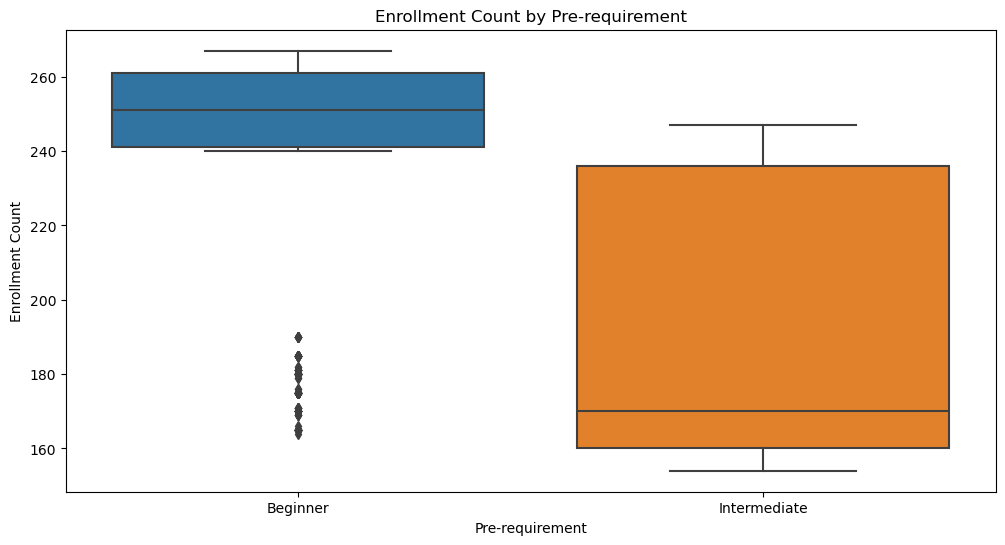

In [19]:
# Enrollment count by pre_requirement
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='pre_requirement', y='enrollment_count')
plt.title('Enrollment Count by Pre-requirement')
plt.xlabel('Pre-requirement')
plt.ylabel('Enrollment Count')
plt.show()


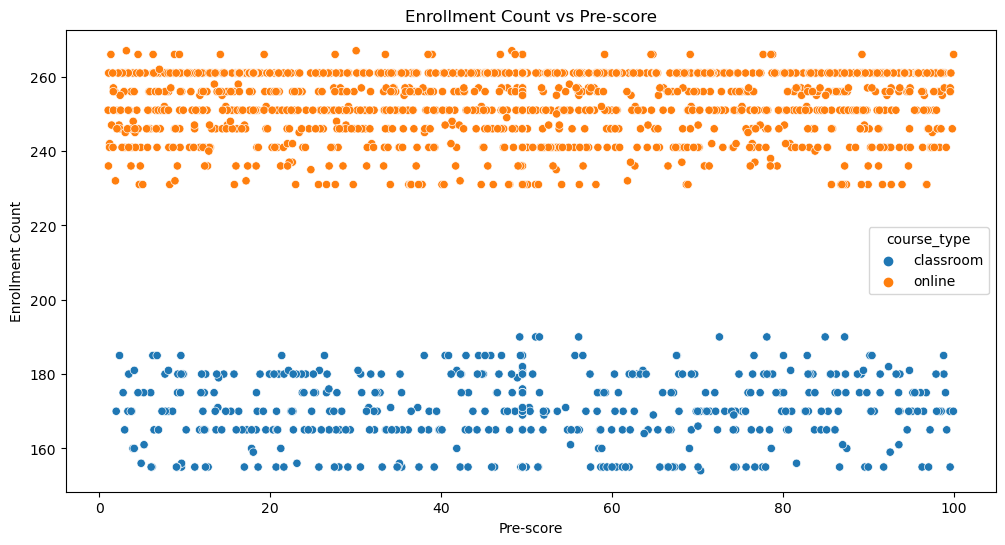

In [20]:
# Enrollment count vs pre_score
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='pre_score', y='enrollment_count', hue='course_type')
plt.title('Enrollment Count vs Pre-score')
plt.xlabel('Pre-score')
plt.ylabel('Enrollment Count')
plt.show()


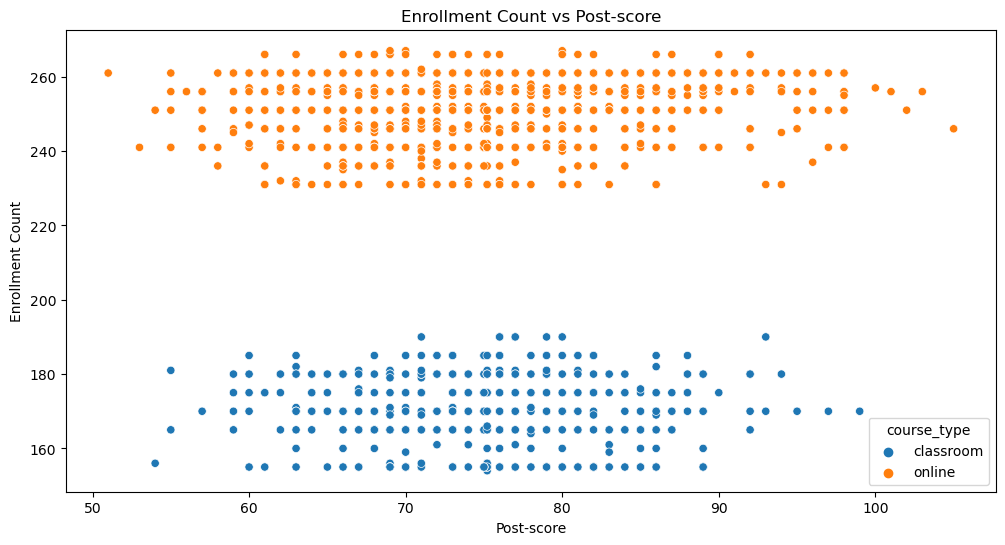

In [21]:
# Enrollment count vs post_score
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='post_score', y='enrollment_count', hue='course_type')
plt.title('Enrollment Count vs Post-score')
plt.xlabel('Post-score')
plt.ylabel('Enrollment Count')
plt.show()


## Statistical Analysis


In [22]:
from scipy import stats

# Separate data by course type
online_enrollments = df[df['course_type'] == 'online']['enrollment_count']
classroom_enrollments = df[df['course_type'] == 'classroom']['enrollment_count']

# Perform t-test
t_stat, p_val = stats.ttest_ind(online_enrollments, classroom_enrollments)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 177.0383377938837, P-value: 0.0


## Coclusion:
The t-test results indicate a statistically significant difference in enrollment counts between online and classroom courses T-statistic: 177.038, P-value: 0.0. This suggests that the type of course significantly impacts enrollment trends